In [51]:
!pip install fake-useragent

In [31]:
!pip install BeautifulSoup4

  Using cached soupsieve-2.5-py3-none-any.whl.metadata (4.7 kB)
   ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
   ---------------------------------------- 147.9/147.9 kB 4.3 MB/s eta 0:00:00
Using cached soupsieve-2.5-py3-none-any.whl (36 kB)


In [24]:
!pip install undetected-chromedriver

     ---------------------------------------- 0.0/65.4 kB ? eta -:--:--
     ---------------------------------------- 65.4/65.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/125.0 kB ? eta -:--:--
   ---------------------------------------- 125.0/125.0 kB 7.2 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47130 sha256=6288beca2caddedf4bc5595ecde09bfe8edc147d69388645dcb147256a3c858f
  Stored in directory: c:\users\alex\appdata\local\pip\cache\wheels\d1\9c\b4\

In [2]:
!pip install requests

  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp39-cp39-win_amd64.whl.metadata (34 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
Using cached charset_normalizer-3.3.2-cp39-cp39-win_amd64.whl (100 kB)


In [1]:
!pip install numpy
!pip install matplotlib
!pip install Selenium

  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached matplotlib-3.8.3-cp39-cp39-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp39-cp39-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.49.0-cp39-cp39-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.2.0-cp39-cp39-win_amd64.whl.metadata (9.9 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.3-cp39-cp39-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp39-cp39-win_amd64.whl (181 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.49.0-cp39-cp39-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl (56 kB)
Using cached pillow-10.2.0-cp39-cp39-win_amd64.whl (2.6 MB)
Using cached

In [3]:
import requests
import numpy as np
import undetected_chromedriver as uc
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [2]:
# Create Chromeoptions instance 
options = webdriver.ChromeOptions() 
 
# Adding argument to disable the AutomationControlled flag 
options.add_argument("--disable-blink-features=AutomationControlled") 
 
# Exclude the collection of enable-automation switches 
options.add_experimental_option("excludeSwitches", ["enable-automation"]) 
 
# Turn-off userAutomationExtension 
options.add_experimental_option("useAutomationExtension", False) 
 
# Setting the driver path and requesting a page 
driver = webdriver.Chrome(options=options) 

driver = webdriver.Chrome()

InvalidArgumentException: Message: invalid argument: cannot parse capability: goog:chromeOptions
from invalid argument: unrecognized chrome option: excludeSwitches
Stacktrace:
	GetHandleVerifier [0x003D8C93+51395]
	(No symbol) [0x00345EF1]
	(No symbol) [0x001FE13A]
	(No symbol) [0x0021B625]
	(No symbol) [0x0021D1F0]
	(No symbol) [0x0021A28C]
	(No symbol) [0x0025B518]
	(No symbol) [0x0025B188]
	(No symbol) [0x0025C2DC]
	(No symbol) [0x0025C1FA]
	(No symbol) [0x00253C26]
	(No symbol) [0x0022C629]
	(No symbol) [0x0022D40D]
	GetHandleVerifier [0x00756453+3711107]
	GetHandleVerifier [0x0079583A+3970154]
	GetHandleVerifier [0x00790B28+3950424]
	GetHandleVerifier [0x00489C99+776393]
	(No symbol) [0x003516C4]
	(No symbol) [0x0034C5A8]
	(No symbol) [0x0034C759]
	(No symbol) [0x0033DD80]
	BaseThreadInitThunk [0x76167BA9+25]
	RtlInitializeExceptionChain [0x774EBD2B+107]
	RtlClearBits [0x774EBCAF+191]


In [32]:
# Alternative webdriver
driver = uc.Chrome()

# Enlaces:
Teatro falla: https://www.fotocasa.es/es/comprar/viviendas/cadiz-capital/alameda-mentidero-teatro-falla/1

Bahia blanca: https://www.fotocasa.es/es/comprar/viviendas/cadiz-capital/asdrubal-bahia-blanca/l

Corte-Inglés: https://www.fotocasa.es/es/comprar/viviendas/cadiz-capital/astilleros-la-paz-loreto-el-corte-ingles/l

Centro-Histórico: https://www.fotocasa.es/es/comprar/viviendas/cadiz-capital/centro-historico/l


In [5]:
driver.get("https://www.fotocasa.es/es/comprar/viviendas/cadiz-capital/centro-historico/l")

In [10]:
all_links =[]

In [19]:
elements = driver.find_elements(By.CSS_SELECTOR,'[href]')
links = [elements.get_attribute('href') for elements in elements]
all_links.extend(links)

In [20]:
import re

filtered_links = [link for link in all_links if re.match(r"https:\/\/www.fotocasa.es\/es\/comprar\/vivienda\/cadiz-capital\/.*\/d\?from=list", link)]
filtered_links = list(set(filtered_links))



In [21]:
len(filtered_links)

256

In [22]:
with open('./links/centro_historico.txt', 'w') as file:
    for link in filtered_links:
        file.write(link + '\n')

# Extracción de Datos de cada Link


In [4]:
driver.get("https://www.fotocasa.es/es/comprar/vivienda/cadiz-capital/aire-acondicionado-ascensor/181784044/d?from=list")

In [ ]:
driver.find_element(By.CLASS_NAME, 'sui-MoleculeCollapsible-btn').click()

In [27]:
# Get description
description = driver.find_element(By.CLASS_NAME, 'fc-DetailDescription')
print("Descripción: \n", description.text)

Descripción: 
 Magnífico piso en perfectas condiciones para entrar a vivir, muy cerca de la estación de tren de San Severiano con muchos comercios, bares y parada de transportes publicos, se encuentra a 200 m de la playa de Santa María a pie y del paseo maritimo de Cádiz para recorrerlo hasta los campos del sur sintiendo el calor del sol y ver el maravilloso paisaje de un oceáno inmenso azul. Situada en una de las urbanizaciones mas prestigiosas de Cádiz.

La vivienda se situa en una segunda planta con orientación Este. Todas sus habitaciones y estancias son exteriores por lo que tendrás maravillosas vistas y luz natural todo el día y para tu comodidad dispone de dos ascensores.

Entrando en en el domicilio nos recibe un hall de entrada, con cocina independiente con zona de comedor y puertas correderas que enlazan al salón, tres dormitorios y cuarto de baño.
Carpintería exterior PVC/Clima
No dudes en visitarlo, te sentiras como en tu casa.


Por mandato expreso del propietario, comerci

In [23]:
characteristics = driver.find_elements(By.CLASS_NAME, 're-DetailFeaturesList-feature')
for i in range(len(characteristics)):
    print(characteristics[i].text)

Tipo de inmueble
Piso
Orientación
Este
Antigüedad
30 a 50 años
Planta
Sótano
Ascensor
Sí
Consumo energía
G
999 kW h m² / año
Emisiones
G
999 kg CO₂ m² / año


In [26]:
# Get header description
header = driver.find_elements(By.CLASS_NAME, 're-DetailHeader-features')
for i in range(len(header)):
    print(header[i].text)

3 habs.
1 baño
88 m²
Sótano


In [29]:
# Get Price
price = driver.find_element(By.CLASS_NAME, 're-DetailHeader-price')
price.text

'200.000 €'

In [53]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options




In [33]:
driver = uc.Chrome()

In [43]:
driver.find_element(By.CLASS_NAME, 'icon-arrow-right-after').click()

In [8]:
driver.get("https://bot.sannysoft.com/")

In [69]:
import time
with open('./links/centro_historico.txt', 'r') as file:
    links = file.readlines()


data = []
i=0
cont = input()

while cont != '0':
    tmp_data = []
    # Get header description
    header = driver.find_elements(By.CLASS_NAME, 're-DetailHeader-features')
    header_data = []
    for j in range(len(header)):
        print(header[j].text)
        header_data.append(header[j].text)
    tmp_data.append(header_data)

    # Get description
    description = driver.find_element(By.CLASS_NAME, 'fc-DetailDescription')
    print("Descripción: \n", description.text)
    tmp_data.append(description.text)

    # Get characteristics
    characteristics = driver.find_elements(By.CLASS_NAME, 're-DetailFeaturesList-feature')
    characteristics_data = []
    for j in range(len(characteristics)):
        print(characteristics[j].text)
        characteristics_data.append(characteristics[j].text)
    tmp_data.append(characteristics_data)

    # Get Price
    price = driver.find_element(By.CLASS_NAME, 're-DetailHeader-price')
    print("Precio: ",price.text)
    tmp_data.append(price.text)

    data.append(tmp_data)
    i+=1
    cont = input()


1 hab.
1 baño
50 m²
Descripción: 
 Se vende apartamento en el Mentidero- Teatro Falla.
Este cuenta con 50m2 distribuídos en 1 habitación, 1 baño, salón, cocina equipada y amueblada, calefacción individual eléctrica y ascensor.
¡Llamenos y pregunte!

En cumplimiento del Decreto de la Junta de Andalucía 218/2005 del 11 de Octubre, se informa a los clientes que los gastos notariales, registrales, la gestoría, los impuestos (ITP, AJD o IVA), los gastos inherentes a la compra, no están incluidos en el precio.
#ref:258
Tipo de inmueble
Apartamento
Ascensor
Sí
Amueblado
Sí
Consumo energía
G
999 kW h m² / año
Emisiones
G
999 kg CO₂ m² / año
Precio:  199.000 €


In [12]:
data = []

In [28]:
tmp_data = []
# Get header description
header = driver.find_elements(By.CLASS_NAME, 're-DetailHeader-features')
header_data = []
for j in range(len(header)):
    print(header[j].text)
    header_data.append(header[j].text)
tmp_data.append(header_data)

# Get description
description = driver.find_element(By.CLASS_NAME, 'fc-DetailDescription')
print("Descripción: \n", description.text)
tmp_data.append(description.text)

# Get characteristics
characteristics = driver.find_elements(By.CLASS_NAME, 're-DetailFeaturesList-feature')
characteristics_data = []
for j in range(len(characteristics)):
    print(characteristics[j].text)
    characteristics_data.append(characteristics[j].text)
tmp_data.append(characteristics_data)

# Get Price
price = driver.find_element(By.CLASS_NAME, 're-DetailHeader-price')
print("Precio: ",price.text)
tmp_data.append(price.text)

data.append(tmp_data)

2 habs.
1 baño
60 m²
2ª Planta
Descripción: 
 Inmobiliaria Vivencadiz os presenta este inmueble completamente reformado, interior pero con muchísima luz en una zona ideal.

Consta de salón-cocina, 2 habitaciones dobles muy amplias y baño todo completamente nuevo, se entrega sin muebles.

Si estas pensando en vender tu casa no dudes en contactarnos.

¿a que esperas a venir a verlo?

*gastos, impuestos y honorarios no incluidos en el precio.
Tipo de inmueble
Piso
Estado
Casi nuevo
Planta
2ª planta
Consumo energía
C
999 kW h m² / año
Emisiones
D
999 kg CO₂ m² / año
Precio:  174.000 €


In [25]:
data

[[['2 habs.\n1 baño\n88 m²\n3ª Planta'],
  'Piso en CENTRO CIUDAD, con 88 m² construidos, 2 dormitorios, 1 baños, buen estado, interior, planta 3, 3 plantas del edificio, . SIN COMISIÓN INMOBILIARIA PARA EL COMPRADOR.\n\nCASASCADIZ les presenta este fantástico ático situado muy cerca de la Plaza del Mentidero, en Cádiz.\n\nPiso situado en una tercera planta, con una superficie construida de 88 m2, distribuidos en hall de entrada, cocina independiente, salón-comedor, pasillo distribuidor con dos dormitorios y un baño.\n\nZona muy consolidada, justo detrás de la Facultad de Filosofía y Letras, al lado del Parque Genovés. A escasos 3 minutos del Gran Teatro Falla y 10 minutos de la Playa de la Caleta.\n\nSin comisión inmobiliaria, no lo dude y solicite visita sin compromiso.\n\nPueden contactar llamando o via WhatsApp:\nCarlos: 698,498,630 o bien escribir a: carlos@casascadiz,com',
  ['Tipo de inmueble\nPiso',
   'Planta\n3ª planta',
   'Consumo energía\nG\n999 kW h m² / año',
   'Emision

In [43]:
import requests
request = requests.get("https://www.fotocasa.es/es/comprar/vivienda/cadiz-capital/aire-acondicionado-ascensor/181784044/d?from=list")

'<!DOCTYPE html>\n<html>\n    <head>\n        <noscript>\n            <title>SENTIMOS LA INTERRUPCIÓN</title>\n        </noscript>\n\n        <meta name="viewport" content="width=1000">\n        <meta name="robots" content="noindex, nofollow">\n        <meta http-equiv="cache-control" content="no-cache, no-store, must-revalidate">\n        <meta http-equiv="pragma" content="no-cache">\n        <meta http-equiv="expires" content="0">\n        <meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1" />\n\n        <style>\n            .container { max-width: 800px; margin: auto; font-family: \'Helvetica Neue\',Helvetica,Arial,sans-serif; color: #7a838c; }\n            h1 { color: #2a2d30; font-weight: 500; }\n            li { margin: 0 0 10px; }\n            a { color: #428bca; }\n            a:hover, a:focus { color: #2a6496; }\n        </style>\n\n        <script charset="UTF-8">\n            function showBlockPage() {\n                document.title = "SENTIMOS LA INTERR
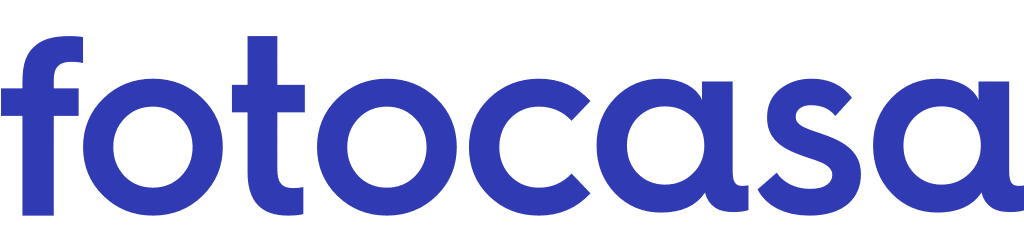

In [51]:
import time
from selenium import webdriver

with open('./links/centro_historico.txt', 'r') as file:
    links = file.readlines()

for i in range(len(links)):
    PROXY = get_proxies()[i]
    print(PROXY)
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--proxy-server=%s' % PROXY)
    driver = uc.Chrome(options=chrome_options)
    driver.get(links[i])
    time.sleep(5)
    driver.quit()



152.32.132.220:80
153.19.91.77:80
138.91.159.185:80


KeyboardInterrupt: 

In [47]:
def get_proxies():
    
  proxy_list =  """
152.32.132.220:80
153.19.91.77:80
138.91.159.185:80
190.110.226.162:80
114.156.77.107:8080
162.223.89.84:80
50.173.140.147:80
37.156.28.43:3128
50.207.199.86:80
50.175.212.66:80
50.218.224.35:80
50.222.245.40:80
50.170.152.189:80
50.223.246.226:80
50.169.118.211:80
50.172.227.202:80
0.0.0.0:80
51.210.127.15:80
160.16.65.167:80
50.173.140.150:80
50.174.145.11:80
217.112.80.252:80
152.230.215.123:80
50.168.210.226:80
50.175.212.72:80
66.191.31.158:80
50.170.90.29:80
50.172.39.98:80
50.223.38.6:80
50.175.212.79:80
50.174.214.222:80
50.174.145.13:80
154.208.10.126:80
50.168.210.234:80
50.222.245.46:80
50.172.75.123:80
50.222.245.47:80
50.174.7.162:80
68.185.57.66:80
50.173.140.149:80
50.168.163.179:80
50.239.72.17:80
50.174.7.156:80
50.168.163.180:80
50.174.7.152:80
50.173.140.144:80
50.231.110.26:80
50.218.57.71:80
62.99.138.162:80
50.218.57.65:80
50.217.226.45:80
8.222.239.209:80
50.174.7.157:80
50.204.219.225:80
8.219.97.248:80
50.239.72.18:80
50.218.57.66:80
47.88.3.19:8080
93.171.220.229:8888
51.15.242.202:8888
50.218.57.70:80
50.217.226.43:80
198.49.68.80:80
194.182.163.117:3128
50.204.219.228:80
50.222.245.45:80
64.227.134.208:80
50.207.199.84:80
50.173.140.148:80
50.173.140.145:80
50.207.199.85:80
216.137.184.253:80
162.120.71.11:80
50.170.90.28:80
50.170.90.25:80
35.185.196.38:3128
178.128.113.118:23128
50.207.199.87:80
50.207.199.83:80
89.36.114.38:80
50.204.219.227:80
190.103.177.131:80
50.218.57.69:80
50.168.72.115:80
50.173.140.151:80
200.25.254.193:54240
80.228.235.6:80
50.239.72.16:80
50.217.226.41:80
50.217.226.44:80
50.174.7.155:80
50.218.57.64:80
50.217.226.46:80
127.0.0.7:80
50.204.219.224:80
50.217.226.42:80
162.223.94.166:80
195.23.57.78:80
50.200.12.81:80
50.200.12.87:80
152.231.62.1:999
138.204.20.160:8080
190.61.46.229:999
162.248.227.140:80
95.217.106.245:2501
190.14.249.174:999
191.102.107.238:999
50.231.172.74:80
50.174.7.158:80
50.174.145.14:80
50.168.210.238:80
50.222.245.42:80
50.170.90.26:80
50.168.163.182:80
50.168.7.250:80
50.174.216.110:80
50.222.245.44:80
162.223.94.164:80
50.172.75.122:80
50.172.75.124:80
50.174.145.9:80
50.174.145.10:80
50.175.212.74:80
50.169.37.50:80
50.174.145.15:80
50.173.140.146:80
50.172.75.121:80
32.223.6.94:80
50.222.245.43:80
50.222.245.41:80
50.222.245.50:80
50.169.23.170:80
50.172.75.126:80
50.168.210.232:80
50.168.210.236:80
50.221.230.186:80
50.171.68.130:80
50.174.145.12:80
50.168.89.184:80
50.220.168.134:80
68.188.59.198:80
50.168.163.178:80
50.168.163.177:80
50.173.140.138:80
50.168.72.117:80
50.218.57.74:80
50.218.57.68:80
50.204.219.229:80
50.217.226.47:80
50.174.145.8:80
50.207.199.80:80
50.170.90.31:80
50.168.72.118:80
50.168.72.114:80
50.207.199.81:80
50.237.207.186:80
50.170.90.30:80
50.231.104.58:80
50.207.199.82:80
50.168.72.113:80
50.170.90.34:80
85.26.146.169:80
50.217.226.40:80
50.170.90.27:80
50.168.163.181:80
50.204.219.231:80
50.172.23.10:80
50.169.135.10:80
50.168.163.166:80
50.168.72.112:80
50.218.57.67:80
24.205.201.186:80
50.200.12.85:80
50.217.29.198:80
50.200.12.80:80
203.150.128.148:8080
200.111.249.195:999
173.212.205.225:3186
45.70.237.36:8888
179.49.159.50:999
176.236.124.252:10001
62.3.30.70:8080
43.249.224.170:83
5.252.23.220:3128
5.252.23.206:3128
93.85.67.63:3128
153.139.233.218:8080
167.71.5.83:3128
194.67.91.153:80
51.75.206.209:80
20.210.113.32:80
115.96.208.124:8080
138.68.60.8:3128
103.127.1.130:80
209.97.150.167:3128
20.24.43.214:80
20.206.106.192:80
47.74.152.29:8888
46.47.197.210:3128
41.65.236.39:1981
219.93.101.60:80
150.107.136.110:8082
1.224.3.122:3889
41.77.188.131:80
20.111.54.16:8123
149.172.228.208:80
41.111.198.108:80
50.172.75.120:80
213.33.2.28:80
50.168.210.239:80
211.128.96.206:80
188.166.56.246:80
50.174.7.153:80
190.58.248.86:80
50.204.190.234:80
95.164.89.123:8888
20.205.61.143:8123
196.20.125.149:8083
103.163.51.254:80
80.150.50.226:80
50.174.7.159:80
79.127.56.147:8080
14.241.236.189:2512
103.244.145.135:3128
8.217.118.156:80
179.1.192.12:999
177.242.151.154:8080
35.209.198.222:80
200.174.198.95:8888
45.92.108.112:80
51.75.122.80:80
116.203.49.36:80
103.35.189.217:3128
209.13.186.20:80
12.186.205.121:80
50.168.72.122:80
159.203.61.169:3128
198.168.189.54:80
175.183.82.221:80
69.70.244.34:82
82.146.37.145:80
185.165.46.208:3128
174.138.94.117:80
162.223.91.11:80
35.210.106.5:80
103.174.102.127:80
50.168.210.235:80
20.193.135.50:80
50.174.7.154:80
13.51.69.207:80
43.128.107.251:8888
114.129.2.82:8081
43.156.0.125:8888
213.33.126.130:80
103.166.141.74:20074
34.23.45.223:80
172.235.16.236:80
154.118.228.212:80
50.202.75.26:80
47.56.110.204:8989
80.13.43.193:80
178.218.95.6:8123
115.89.203.59:80
82.223.102.92:9443
78.158.171.72:8080
190.6.204.141:999
103.87.171.38:32650
31.7.70.215:3128
89.40.142.116:3128
36.67.123.173:8080
159.223.174.128:3128
202.180.16.1:8080
49.156.63.1:8080
103.247.23.202:8080
103.156.14.18:8080
209.126.6.159:80
54.193.86.81:3128
13.81.217.201:80
162.144.233.16:80
154.236.179.229:1981
72.10.160.91:18031
5.161.103.41:88
67.43.236.19:10587
67.43.236.20:16829
67.43.227.227:4479
134.213.213.124:80
213.143.113.82:80
89.145.162.81:3128
67.43.227.228:9039
41.207.187.178:80
84.39.112.144:3128
20.27.86.185:80
50.168.72.116:80
82.119.96.254:80
85.8.68.2:80
47.243.205.1:3128
50.170.90.24:80
51.255.20.138:80
154.202.118.236:3128
154.84.142.247:3128

    """ 
  # Split the string by newlines to get each proxy individually
  proxies = proxy_list.strip().split("\n")

  # Convert the list of proxies into a set
  proxy_set = set(proxies)
  return proxies